In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df = pd.read_csv("../datasets/final/HCLTECH.csv")

In [3]:
df.shape

(102, 83)

In [4]:
df.drop(df.columns[0], axis=1, inplace=True)

In [5]:
df.set_index(df.columns[0], inplace=True)

In [6]:
# df = df.T

In [7]:
df

,4-Jun,4-Sep,4-Dec,5-Mar,5-Jun,5-Sep,5-Dec,6-Mar,6-Jun,6-Sep,...,22-Mar,22-Jun,22-Sep,22-Dec,23-Mar,23-Jun,23-Sep,23-Dec,24-Mar,24-Jun
4-Mar,,,,,,,,,,,,,,,,,,,,,
30.962500,37.312500,44.525002,42.994999,46.562500,48.687500,56.907501,67.387497,81.775002,63.082500,68.775002,...,1163.75,973.25,932.349976,1039.300049,1085.25,1187.949951,1234.800049,1466.099976,1543.550049,1459.599976
59.220000,59.220000,59.220000,59.220000,63.840000,63.840000,63.840000,63.840000,64.690000,64.690000,64.690000,...,543.00,543.00,543.000000,543.000000,543.00,543.000000,543.000000,543.000000,543.000000,543.000000
59.220000,59.220000,59.220000,59.220000,63.840000,63.840000,63.840000,63.840000,64.690000,64.690000,64.690000,...,543.00,543.00,543.000000,543.000000,543.00,543.000000,543.000000,543.000000,543.000000,543.000000
2231.960000,2231.960000,2231.960000,2231.960000,2796.140000,2796.140000,2796.140000,2796.140000,2511.180000,2511.180000,2511.180000,...,42048.00,42048.00,42048.000000,42048.000000,40561.00,40561.000000,40561.000000,40561.000000,38927.000000,38927.000000
2231.960000,2231.960000,2231.960000,2231.960000,2796.140000,2796.140000,2796.140000,2796.140000,2511.180000,2511.180000,2511.180000,...,42048.00,42048.00,42048.000000,42048.000000,40561.00,40561.000000,40561.000000,40561.000000,38927.000000,38927.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1962.145758,1962.145758,1962.145758,1962.145758,1962.145758,1962.145758,1962.145758,1962.145758,1962.145758,1962.145758,1962.145758,...,3472.00,3488.00,3544.000000,4125.000000,3559.00,3409.000000,3950.000000,4391.000000,3706.000000,3401.000000
0.020000,6.340000,4.460000,2.520000,2.930000,-0.250000,3.140000,6.930000,-1.000000,6.380000,5.440000,...,469.00,810.00,803.000000,929.000000,715.00,813.000000,984.000000,1042.000000,943.000000,922.000000
1556.875000,1556.875000,1556.875000,1556.875000,1556.875000,1556.875000,1556.875000,1556.875000,1556.875000,1556.875000,1556.875000,...,3003.00,2678.00,2741.000000,3196.000000,2844.00,2596.000000,2966.000000,3349.000000,2763.000000,2479.000000


In [8]:
closing_prices = df.iloc[0, 1:].values.astype(float)

scaler = MinMaxScaler(feature_range=(0, 1))
closing_prices_scaled = scaler.fit_transform(closing_prices.reshape(-1, 1))

In [9]:
def create_sequences(data, look_back):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i+look_back])
        y.append(data[i+look_back])
    return np.array(X), np.array(y)

look_back = 9
X, y = create_sequences(closing_prices_scaled, look_back)

In [10]:
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

In [11]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [12]:
model = Sequential()
model.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=(look_back, 1)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(50, return_sequences=False)))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
2/2 [==============================] - 12s 2s/step - loss: 0.0345 - val_loss: 0.2390
Epoch 2/50
2/2 [==============================] - 0s 129ms/step - loss: 0.0097 - val_loss: 0.0549
Epoch 3/50
2/2 [==============================] - 0s 85ms/step - loss: 0.0073 - val_loss: 0.0194
Epoch 4/50
2/2 [==============================] - 0s 115ms/step - loss: 0.0109 - val_loss: 0.0224
Epoch 5/50
2/2 [==============================] - 0s 168ms/step - loss: 0.0063 - val_loss: 0.0418
Epoch 6/50
2/2 [==============================] - 0s 70ms/step - loss: 0.0030 - val_loss: 0.0689
Epoch 7/50
2/2 [==============================] - 0s 138ms/step - loss: 0.0035 - val_loss: 0.0827
Epoch 8/50
2/2 [==============================] - 0s 92ms/step - loss: 0.0048 - val_loss: 0.0776
Epoch 9/50
2/2 [==============================] - 0s 111ms/step - loss: 0.0046 - val_loss: 0.0573
Epoch 10/50
2/2 [==============================] - 0s 135ms/step - loss: 0.0030 - val_loss: 0.0357
Epoch 11/50
2/2 [=======

In [14]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

1/1 [==============================] - 0s 48ms/step


In [15]:
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

In [16]:
y_train_scaled = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

In [17]:
full_closing_prices = scaler.inverse_transform(closing_prices_scaled)
all_predictions = np.concatenate([train_predictions, test_predictions], axis=0)

In [18]:
future_predictions = []
last_sequence = closing_prices_scaled[-look_back:]

In [19]:
num_future_predictions = 4
for _ in range(num_future_predictions):
    next_pred = model.predict(last_sequence.reshape(1, look_back, 1))
    future_predictions.append(next_pred[0, 0])
    last_sequence = np.append(last_sequence[1:], next_pred).reshape(look_back, 1)

1/1 [==============================] - 0s 40ms/step


In [20]:
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

In [21]:
extended_predictions = np.concatenate([all_predictions, future_predictions])

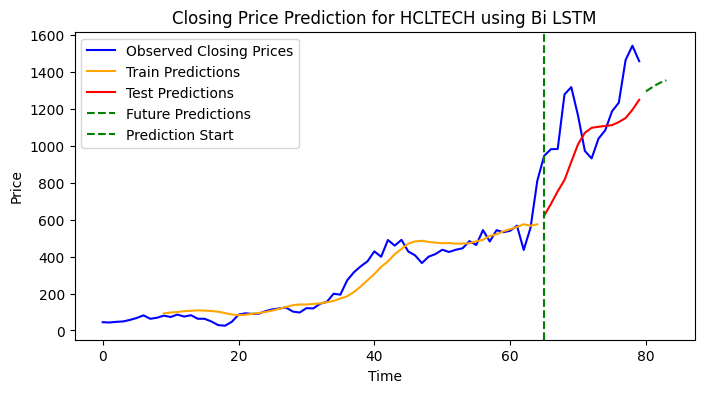

In [22]:
plt.figure(figsize=(8,4))
plt.plot(full_closing_prices, color='blue', label='Observed Closing Prices')
plt.plot(np.arange(look_back, look_back + len(train_predictions)), train_predictions, color='orange', label='Train Predictions')
plt.plot(np.arange(look_back + len(train_predictions), look_back + len(train_predictions) + len(test_predictions)), test_predictions, color='red', label='Test Predictions')
plt.plot(np.arange(len(full_closing_prices), len(full_closing_prices) + num_future_predictions), future_predictions, color='green', linestyle='--', label='Future Predictions')
plt.axvline(x=len(full_closing_prices) - len(test_predictions), color='green', linestyle='--', label='Prediction Start')
plt.title('Closing Price Prediction for HCLTECH using Bi LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [23]:
mae = mean_absolute_error(y_test_scaled, test_predictions)
mse = mean_squared_error(y_test_scaled, test_predictions)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test_scaled - test_predictions) / y_test_scaled)) * 100

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

Mean Absolute Error (MAE): 218.55141610708333
Mean Squared Error (MSE): 64782.04223814858
Root Mean Squared Error (RMSE): 254.52316640759554
Mean Absolute Percentage Error (MAPE): 18.500539960660262%
